## Importeren van de data

Als eerste moeten we de data importen. We openen daarvoor de csv file en zetten de data in verschillende variabelen:

* columns is een dictionary die de naam van de kolom vertaalt naar de index voor de data array
* rows is een list van elke rij die als een list is opgeslagen
* data is een dictionary van de index van de kolom naar een lijst van data voor die kolom

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1
    print(f'Processed {line_count} lines.')

Processed 224 lines.


Hier printen we de namen van de kolommen zodat je kan zien welke data er in het bestand zit

In [3]:
print(columns)

{'\ufeffID': 0, 'RegioS': 1, 'Perioden': 2, 'BevolkingAanHetBeginVanDePeriode_1': 3, 'LevendGeborenKinderen_2': 4, 'Overledenen_3': 5, 'TotaleVestiging_4': 6, 'VestigingVanuitEenAndereGemeente_5': 7, 'Immigratie_6': 8, 'TotaalVertrekInclAdmCorrecties_7': 9, 'VertrekNaarAndereGemeente_8': 10, 'EmigratieInclusiefAdmCorrecties_9': 11, 'OverigeCorrecties_10': 12, 'Bevolkingsgroei_11': 13, 'BevolkingsgroeiRelatief_12': 14, 'BevolkingsgroeiSinds1Januari_13': 15, 'BevolkingsgroeiSinds1JanuariRela_14': 16, 'BevolkingAanHetEindeVanDePeriode_15': 17}


## Verwerken van de data

Hier printen we de data voor alle maanden van het laatste jaar van het vertrek uit de gemeente.

In [4]:
# calculate modus
def calculate_modus(dataset):
    # tell elk getal hoe vaak het voorkomt
    values = {}
    for groei in dataset:
        if groei in values:
            values[groei] += 1
        else:
            values[groei] = 1
    # pak de meest voorkomende getal
    modus = []
    for key, value in values.items():
        if len(modus) == 0:
            modus = [key, value]
        else:
            if modus[1] < value:
                modus = [key, value]
    return modus
# calculating standaard deviatie
def calculate_standaard_deviatie(dataset, average):
    val = 0
    for value in dataset:
        val += (value - average) ** 2
    return math.sqrt(val / len(dataset))

# maak een trend lijn
def linreg(X, Y):
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
print(data[columns['VertrekNaarAndereGemeente_8']][-12:-1])
Bevolkingsgroei = data[columns['Bevolkingsgroei_11']][-13:-1]
b = Bevolkingsgroei.copy()
b.sort()
b_mediaan = b[round(len(Bevolkingsgroei) / 2)]
b_average = sum(Bevolkingsgroei) / len(Bevolkingsgroei)
b_modus = calculate_modus(Bevolkingsgroei)
b_standaard_deviatie = calculate_standaard_deviatie(Bevolkingsgroei, b_average)

b_a,b_b = linreg(range(len(Bevolkingsgroei)),Bevolkingsgroei)

trendline = [b_a*index + b_b for index in range(len(Bevolkingsgroei))]

print("Bevolkingsgroep mediaan: " + str(b_mediaan))
print("Bevolkingsgroep Gemiddelde: " + str(b_average))
print("Bevolkingsgroep Modus: " + str(b_modus[0]) + " komt voor: " + str(b_modus[1]))
print("Bevolkingsgroep Standaard deviatie: " + str(b_standaard_deviatie))
print("Bevolkingsgroei 95%" + str([b_average - 2*b_standaard_deviatie, b_average + 2*b_standaard_deviatie]))
print("Bevolkingsgroei 65%" + str([b_average - b_standaard_deviatie, b_average + b_standaard_deviatie]))

dead = data[columns['Overledenen_3']][-13:-1]
d = dead.copy()
d.sort()
d_mediaan = d[round(len(dead) / 2)]
d_average = sum(dead) / len(dead)
d_modus = calculate_modus(dead)
d_standaard_deviatie = calculate_standaard_deviatie(dead, d_average)
print("Dead mediaan: " + str(d_mediaan))
print("Dead Gemiddelde: " + str(d_average))
print("Dead Modus: " + str(d_modus[0]) + " komt voor: " + str(d_modus[1]))
print("Dead Standaard deviatie: " + str(d_standaard_deviatie))
print("Dead 95%" + str([d_average - 2*d_standaard_deviatie, d_average + 2*d_standaard_deviatie]))
print("Dead 65%" + str([d_average - d_standaard_deviatie, d_average + d_standaard_deviatie]))

SyntaxError: invalid syntax (<ipython-input-4-0124a92bbc8c>, line 55)

NameError: name 'trendline' is not defined

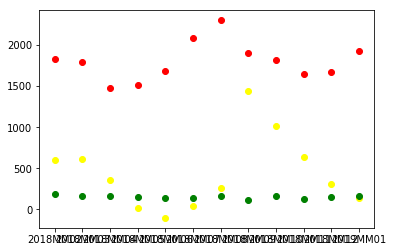

In [5]:
plt.plot( data[columns['Perioden']][-13:-1], data[columns['VertrekNaarAndereGemeente_8']][-13:-1], 'ro')
plt.plot( data[columns['Perioden']][-13:-1], data[columns['Bevolkingsgroei_11']][-13:-1], 'ro',color='yellow')
plt.plot( data[columns['Perioden']][-13:-1], data[columns['Overledenen_3']][-13:-1], 'ro',color='green')
plt.plot( data[columns['Perioden']][-13:-1], trendline,color='yellow')

plt.xticks(rotation=90)
plt.show()